### Some basic EDA to get an understanding of the AI2D dataset

In [4]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 2.9 MB/s eta 0:00:00 0:00:01


In [65]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm import tqdm
from wordcloud import WordCloud
from PIL import Image

# Setting up the base directories
base_dir = "/Users/nandana_hemanth/Documents/Semester III/DATA 255/Project/Dataset/ai2d"
annotations_dir = os.path.join(base_dir, "annotations")
questions_dir = os.path.join(base_dir, "questions")
images_dir = os.path.join(base_dir, "images")
categories_path = os.path.join(base_dir, "categories.json")

### Trying to understand what the "categories.json" file contains

In [32]:
with open(categories_path, 'r') as f:
    diagram_categories = json.load(f)

print(f"\nTotal entries in categories.json: {len(diagram_categories)}")

from collections import Counter
cat_freq = Counter(diagram_categories.values())
print("Top 5 most common categories:")
for cat, count in cat_freq.most_common(5):
    print(f"{cat}: {count}")


Total entries in categories.json: 4903
Top 5 most common categories:
partsOfA: 1395
typesOf: 738
foodChainsWebs: 689
lifeCycles: 547
moonPhaseEquinox: 462


### Trying to understand the "annotations" folder

In [69]:
arrow_counts = []
text_counts = []
rel_counts = []
all_relationship_types = []

for file in os.listdir(annotations_dir):
    with open(os.path.join(annotations_dir, file), 'r') as f:
        ann = json.load(f)

    arrow_counts.append(len(ann.get("arrows", {})))
    text_counts.append(len(ann.get("text", {})))
    rels = ann.get("relationships", {})
    rel_counts.append(len(rels))

    for rel in rels.values():
        all_relationship_types.append(rel.get("category", "unknown"))

print(f"Avg. arrows per diagram: {sum(arrow_counts) / len(arrow_counts):.2f}")
print(f"Avg. text nodes per diagram: {sum(text_counts) / len(text_counts):.2f}")
print(f"Avg. relationships per diagram: {sum(rel_counts) / len(rel_counts):.2f}")

rel_freq = Counter(all_relationship_types)
print("\nTop 5 relationship types:")
for k, v in rel_freq.most_common(5):
    print(f"{k}: {v}")

Avg. arrows per diagram: 7.14
Avg. text nodes per diagram: 8.89
Avg. relationships per diagram: 14.90

Top 5 relationship types:
arrowHeadTail: 18541
intraObjectLabel: 16281
interObjectLinkage: 15802
intraObjectLinkage: 15664
intraObjectRegionLabel: 2002


### Trying to understand the "questions" folder

In [26]:
question_files = sorted(os.listdir(questions_dir))
print(f"\nTotal question files: {len(question_files)}")

total_questions = 0
question_lengths = []

for file in question_files:
    with open(os.path.join(questions_dir, file), 'r') as f:
        data = json.load(f)
    questions = data.get("questions", [])
    total_questions += len(questions)
    for q in questions:
        if isinstance(q, dict):
            q_text = q.get("question", "")
        elif isinstance(q, str):
            q_text = q
        else:
            continue
        question_lengths.append(len(q_text.split()))

print(f"Total questions: {total_questions}")
print(f"Average questions per file: {total_questions / len(question_files):.2f}")
print(f"Average question length (in words): {sum(question_lengths) / len(question_lengths):.2f}")


Total question files: 4563
Total questions: 15501
Average questions per file: 3.40
Average question length (in words): 9.78


### Validating if every image has at least one associated question

In [75]:
image_files = sorted(os.listdir(images_dir))
print(f"\nTotal image files: {len(image_files)}")

# Checking for image format consistency
exts = [os.path.splitext(f)[1] for f in image_files]
from collections import Counter
print("Image file extensions:", Counter(exts))

# Matching images with questions
question_ids = set([f.replace(".png.json", "") for f in question_files])
image_ids = set([f.replace(".png", "").replace(".jpg", "") for f in image_files])
matched_ids = question_ids.intersection(image_ids)

print(f"Images matched with questions: {len(matched_ids)}")
print(f"Missing images: {len(question_ids - image_ids)}")


Total image files: 4903
Image file extensions: Counter({'.png': 4903})
Images matched with questions: 4563
Missing images: 0


### Some basic visualizations to get the gist about the dataset

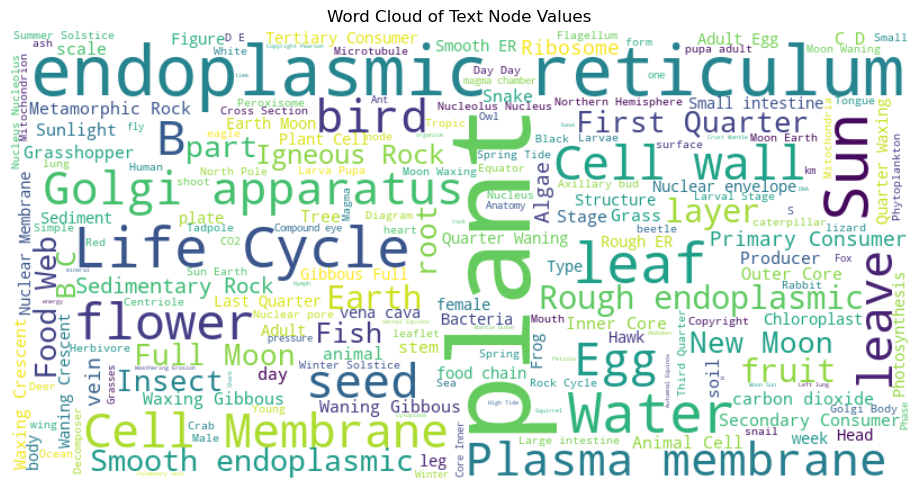

In [78]:
from wordcloud import WordCloud

text_values = []

for file in os.listdir(annotations_dir):
    with open(os.path.join(annotations_dir, file), 'r') as f:
        ann = json.load(f)
    text_values.extend([t.get("value", "") for t in ann.get("text", {}).values()])

text_blob = " ".join(text_values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_blob)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Text Node Values")
plt.tight_layout()
plt.show()

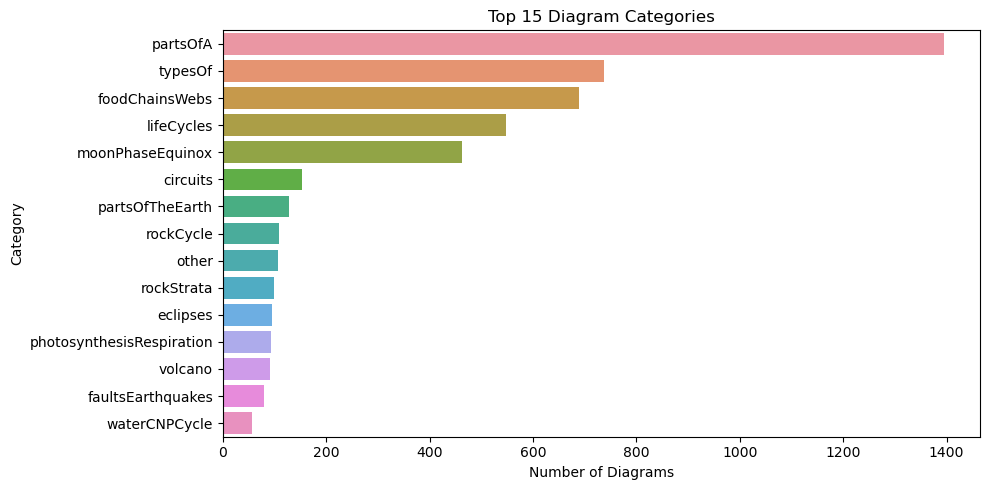

In [80]:
with open(categories_path, 'r') as f:
    diagram_categories = json.load(f)

cat_counter = Counter(diagram_categories.values())
df_cat = pd.DataFrame(cat_counter.items(), columns=["Category", "Count"]).sort_values("Count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_cat.head(15), x="Count", y="Category")
plt.title("Top 15 Diagram Categories")
plt.xlabel("Number of Diagrams")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


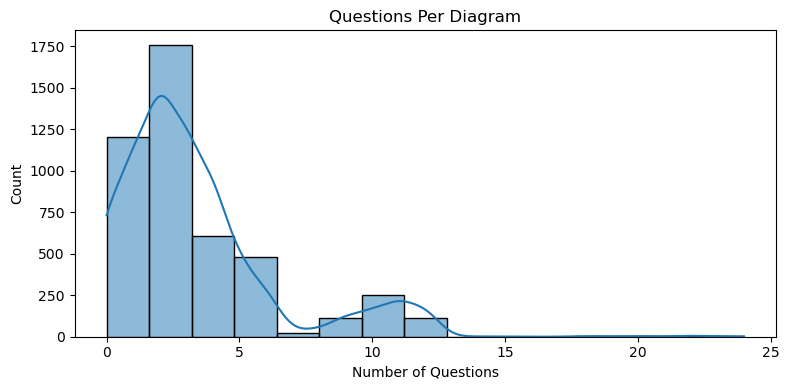

In [82]:
questions_per_diagram = []

for file in os.listdir(questions_dir):
    with open(os.path.join(questions_dir, file), 'r') as f:
        data = json.load(f)
    questions_per_diagram.append(len(data.get("questions", [])))

plt.figure(figsize=(8, 4))
sns.histplot(questions_per_diagram, bins=15, kde=True)
plt.title("Questions Per Diagram")
plt.xlabel("Number of Questions")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


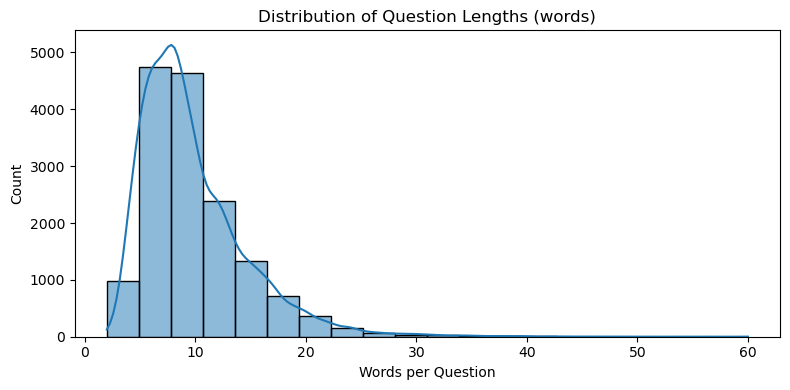

In [84]:
question_lengths = []

for file in os.listdir(questions_dir):
    with open(os.path.join(questions_dir, file), 'r') as f:
        data = json.load(f)
    for q in data.get("questions", []):
        q_text = q if isinstance(q, str) else q.get("question", "")
        question_lengths.append(len(q_text.split()))

plt.figure(figsize=(8, 4))
sns.histplot(question_lengths, bins=20, kde=True)
plt.title("Distribution of Question Lengths (words)")
plt.xlabel("Words per Question")
plt.tight_layout()
plt.show()

### Check what the complete data looks like for one sample in the dataset. Here we are considering the image "100.png"

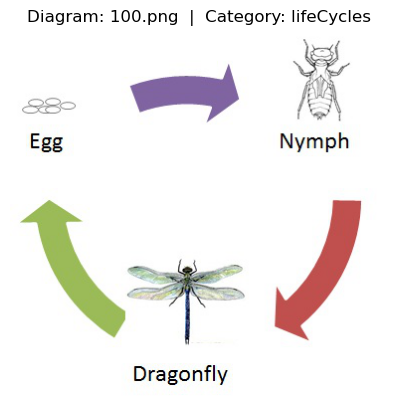


 Questions for 100.png:

Q1: How many stages are shown in the life cycle?
   Option 1: 3
   Option 2: 4
   Option 3: none of the above
   Option 4: 5

Q2: The diagram shows the life cycle of a dragonfly. Which stage is represented by letter B?
   Option 1: Dragonfly
   Option 2: Egg
   Option 3: Nymph
   Option 4: Larva

Q3: What is this a life cycle of?
   Option 1: bee
   Option 2: dragonfly
   Option 3: wasp
   Option 4: none of the above

 Annotation Summary for 100.png:
- Text Nodes: 3
- Arrows: 3
- Relationships: 9

Text Labels:
T0: Egg
T1: NYMPH
T2: Dragonfly

Relationships:
A0+H0: arrowHeadTail (from A0 → H0)
A1+H1: arrowHeadTail (from A1 → H1)
A2+H2: arrowHeadTail (from A2 → H2)
B0+A2+B2: interObjectLinkage (from B0 → B2)
B1+A0+B0: interObjectLinkage (from B1 → B0)
B2+A1+B1: interObjectLinkage (from B2 → B1)
T0+B1: intraObjectLabel (from T0 → B1)
T1+B0: intraObjectLabel (from T1 → B0)
T2+B2: intraObjectLabel (from T2 → B2)


In [91]:
import os
import json
from PIL import Image
import matplotlib.pyplot as plt

# Sample ID and filenames
sample_id = "100"
sample_file = f"{sample_id}.png"
json_file = f"{sample_file}.json"

# Paths
image_path = os.path.join(images_dir, sample_file)
question_path = os.path.join(questions_dir, json_file)
annotation_path = os.path.join(annotations_dir, json_file)

# Loading the category from categories.json
with open(categories_path, 'r') as f:
    diagram_categories = json.load(f)
category = diagram_categories.get(sample_file, "Unknown")

# Displaying the image
if os.path.exists(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Diagram: {sample_file}  |  Category: {category}")
    plt.show()
else:
    print("Image not found.")

# Displaying the questions
if os.path.exists(question_path):
    with open(question_path, 'r') as f:
        question_data = json.load(f)

    questions = question_data.get("questions", {})

    print(f"\n Questions for {sample_file}:")

    if isinstance(questions, dict):
        for i, (q_text, q_info) in enumerate(list(questions.items())[:10]):
            print(f"\nQ{i+1}: {q_text}")
            options = q_info.get("answerTexts", [])
            correct_index = q_info.get("correctAnswer", None)

            for idx, option in enumerate(options):
                marker = "  " if idx == correct_index else "  "
                print(f"{marker} Option {idx + 1}: {option}")
    else:
        print("Unexpected format in 'questions'. Expected dict.")
else:
    print("Questions file not found.")

# Displaying the annotations
if os.path.exists(annotation_path):
    with open(annotation_path, 'r') as f:
        ann_data = json.load(f)

    print(f"\n Annotation Summary for {sample_file}:")
    print(f"- Text Nodes: {len(ann_data.get('text', {}))}")
    print(f"- Arrows: {len(ann_data.get('arrows', {}))}")
    print(f"- Relationships: {len(ann_data.get('relationships', {}))}")

    print("\nText Labels:")
    for tid, t in ann_data.get("text", {}).items():
        print(f"{tid}: {t.get('value')}")

    print("\nRelationships:")
    for rid, rel in ann_data.get("relationships", {}).items():
        print(f"{rid}: {rel.get('category')} (from {rel.get('origin')} → {rel.get('destination')})")
else:
    print("Annotation file not found.")